# Section 8: Decision Tree Regression

Up until now all the regression methods we have considered have a continuous output. In contrast Decision Trees (and Decision Tree Regressions) output discrete values. This is because Decision Tree Regression works by segmenting or grouping the data points across the independent variable space. Once the training data has been fully categorized, the model calculates the average value of the dependent variable for each group. When the value of a new point needs to be predicted the model figure out what group the new value belongs to and predicts the average value of the group for the new point. 

An advantage of this method is the categorical variables can be handled directly without needing to one-hot encode them. It also works well with data sets that consist of primarily of discrete groups (although not required) where a regression method with a continuous output would struggle.

Decision Tree Regression splits the data into groups by looking at the possible splits it could make in a given subgroup, calculating the standard devation of the sub groups for that split and then choosing the split which gives the lowest standard deviations in the subgroups. A more detailed write-up can be found <a href='https://www.saedsayad.com/decision_tree_reg.htm'>here</a>.

In this problem we will use the same data and scenario as the previous section. We are deciding whether a job applicant's reported salary from their previous job is $160,000 dollars or not from a table of average salaries verses job positions.

## Step 1 Import and Prepare the data.

We'll use the template we created in Section 2 to import and preprocess the data.

In [1]:
import numpy as np # Libraries for fast linear algebra and array manipulation
import pandas as pd # Import and manage datasets
from plotly import __version__ as py__version__
import plotly.express as px # Libraries for ploting data
import plotly.graph_objects as go # Libraries for ploting data
import plotly.io as pio
pio.templates.default = "plotly_dark"
from plotly.subplots import make_subplots
from sklearn import __version__ as skl__version__
from sklearn.tree import DecisionTreeRegressor # Library for creating Linear Regression Models

Library versions used in this code:

In [2]:
print('Numpy: ' + np.__version__)
print('Pandas: ' + pd.__version__)
print('Plotly: ' + py__version__)
print('Scikit-learn: ' + skl__version__)

Numpy: 1.16.4
Pandas: 0.25.1
Plotly: 4.0.0
Scikit-learn: 0.21.2


In [3]:
def LoadData():
    dataset = pd.read_csv('Position_Salaries.csv')
    return dataset

dataset = LoadData()
print(dataset.head(6))
print()
print(dataset.info())

            Position  Level  Salary
0   Business Analyst      1   45000
1  Junior Consultant      2   50000
2  Senior Consultant      3   60000
3            Manager      4   80000
4    Country Manager      5  110000
5     Region Manager      6  150000

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
Position    10 non-null object
Level       10 non-null int64
Salary      10 non-null int64
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes
None


In [4]:
X = dataset.iloc[:,1:-1].values # We are only going to use the level feature as the independent variable
y = dataset.iloc[:,-1].values.reshape(-1,1) # The last column is the dependent variable

Notes about the preprocessing:
* We skipped the following sections of preprocessing:
  * Scaling Data - Decision Tree Regression does not require scaled data.
  * Missing Data - The dataset is complete with no missing data
  * Categorical Data - We are not using categorical data in our dataset
  * Splitting the data - Our dataset is very small and this analysis the most data available.

## Step 2: Fit a Regression Model
Below we fit an DTR model.

In [5]:
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X,y.ravel())
X_grid = np.arange(min(X),max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid),1))
y_pred = regressor.predict(X_grid)

## Step 3: Analyze Results

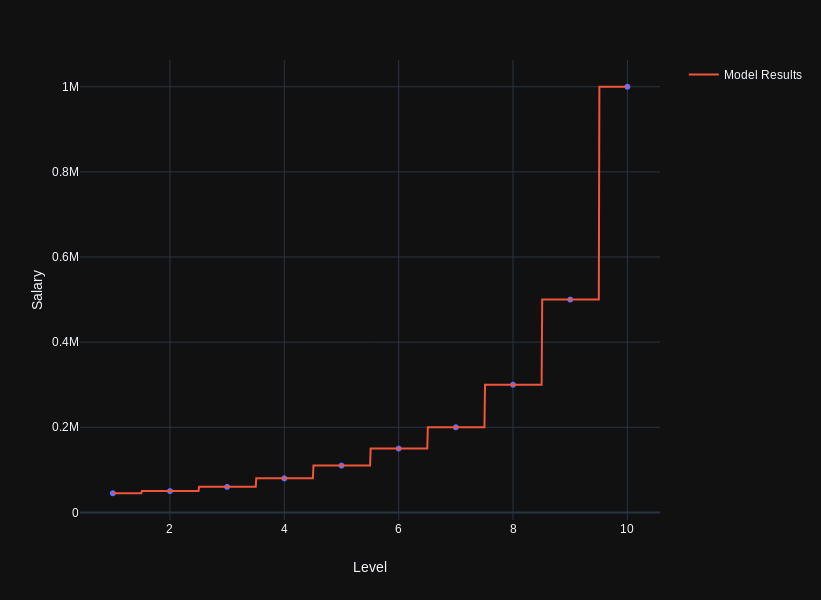

In [8]:
fig = px.scatter(dataset, x='Level', y='Salary')
fig.add_trace(go.Scatter(x = X_grid.flatten(), y = y_pred, name = 'Model Results', mode = 'lines'))
fig.show()
fig.write_image('regression_results.png')

<img src='https://raw.githubusercontent.com/JQCoburn/Machine-Learning-A-Z/Part_2/Part%202%20-%20Regression/Section%208%20-%20Decision%20Tree%20Regression/regression_results.png'>

As we expected from a DTR, we see discrete outputs for out model. In this case it appears each point has been classified into it's own group with the groups evenly split between each point.

## Step 4: Predict value
Finally checking for the job candidate's previous salary we find:

In [7]:
print("Predicted Previous Salary with DTR Model: ${0:.2f}".format(regressor.predict([[6.5]])[0]))

Predicted Previous Salary with DTR Model: $150000.00


In this using this model it appears that the employee maybe over inflating his previous salary, but looking at the model, we see that any position between level 5.5 and 6.5 will get categorized as \$150,000. So our model accuracy may be affected by our limited dataset.